In [1]:
# import libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Histograms

In [10]:
df_DA_US= df[(df['job_title_short']=='Data Analyst')& (df['job_country']== 'United States')].copy()

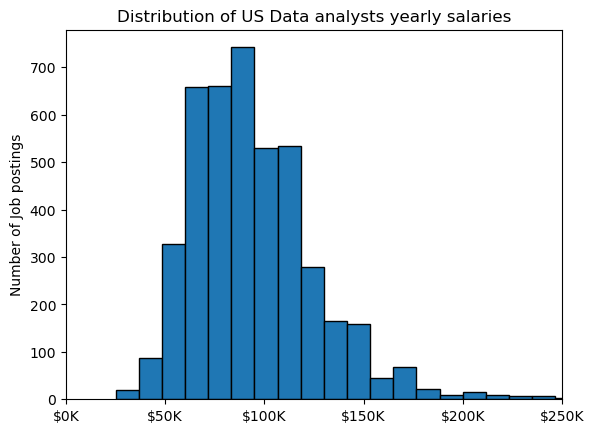

In [13]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.ylabel('Number of Job postings')
plt.title('Distribution of US Data analysts yearly salaries')
plt.show()

# Box Plots

In [14]:
df_DA_US= df_DA_US.dropna(subset= ['salary_year_avg'])

<Axes: >

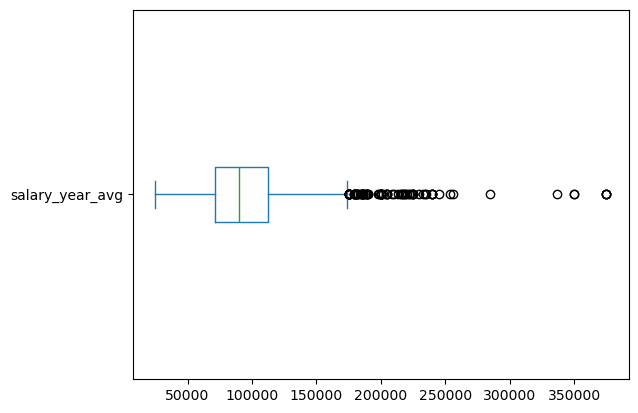

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# plt.boxplot(df_DA_US['salary_year_avg])

In [ ]:
job_titles= ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
# only get data analyst job in the US
df_US= df[(df['job_title_short'].isin(job_titles))& (df['job_country']== 'United States')].copy()

df_US= df_US.dropna(subset=['salary_year_avg'])

job_list= [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\naila\AppData\Local\Temp\ipykernel_17196\2350425357.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


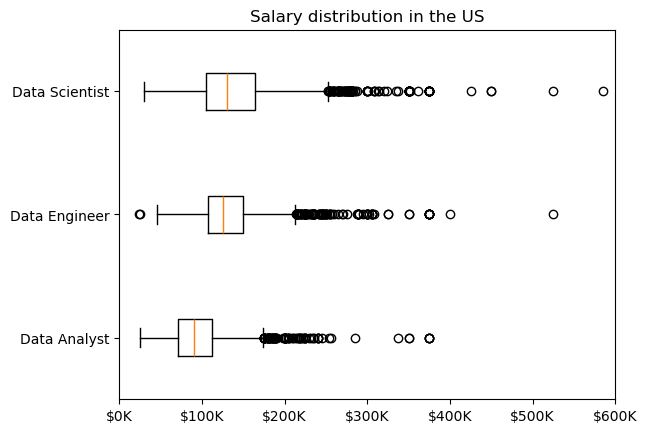

In [25]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary distribution in the US')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()